In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

In [23]:
df= pd.read_json("Automotive_5.json",lines = True)

In [24]:
print(df.columns)
print(df.shape)

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')
(20473, 9)


In [25]:
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged.head()

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y
0,B00002243X,"[4, 4]",5,I needed a set of jumper cables for my new car...,"08 17, 2011",A3F73SC1LY51OO,Alan Montgomery,Work Well - Should Have Bought Longer Ones,1313539200,10,10,10,10,10,10,10,10
1,B00002243X,"[1, 1]",4,"These long cables work fine for my truck, but ...","09 4, 2011",A20S66SKYXULG2,alphonse,Okay long cables,1315094400,10,10,10,10,10,10,10,10
2,B00002243X,"[0, 0]",5,Can't comment much on these since they have no...,"07 25, 2013",A2I8LFSN2IS5EO,Chris,Looks and feels heavy Duty,1374710400,10,10,10,10,10,10,10,10
3,B00002243X,"[19, 19]",5,I absolutley love Amazon!!! For the price of ...,"12 21, 2010",A3GT2EWQSO45ZG,DeusEx,Excellent choice for Jumper Cables!!!,1292889600,10,10,10,10,10,10,10,10
4,B00002243X,"[0, 0]",5,I purchased the 12' feet long cable set and th...,"07 4, 2012",A3ESWJPAVRPWB4,E. Hernandez,"Excellent, High Quality Starter Cables",1341360000,10,10,10,10,10,10,10,10


In [26]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

In [29]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 50]
dfCount

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,totalReviewers,overallScore,summaryReview
5653,B000CITK8S,"[0, 0]",5,I used this over the last winter to keep a cha...,"03 25, 2013",A1FG8HACGF1R5E,LVNeptune,Great for keeping boat / jetski batteries charged,1364169600,169,169,169,169,169,169,169,169,169,5,Great for keeping boat / jetski batteries charged
5648,B000CITK8S,"[2, 2]",5,I installed this on my Audi I keep at a vacati...,"05 26, 2010",A3U1WPDQLP9CQ,Lemon,Easy To Install And Use,1274832000,169,169,169,169,169,169,169,169,169,5,Easy To Install And Use
5637,B000CITK8S,"[0, 0]",5,If you own a motorcycle or anything else that ...,"07 11, 2013",A1EK57XJPWGC6Q,Justin F.,A must have!,1373500800,169,169,169,169,169,169,169,169,169,5,A must have!
5638,B000CITK8S,"[0, 0]",5,When I got a second bike I needed a way to kee...,"03 17, 2014",A353HUHJ0N65YD,Justin F,Must Have for any Motorcyclist,1395014400,169,169,169,169,169,169,169,169,169,5,Must Have for any Motorcyclist
5656,B000CITK8S,"[0, 0]",5,Easy hook-up and a number of options for hook ...,"04 3, 2013",A2XXCCT0TBVDIE,"Michael J. Blais ""MJB""",Very good,1364947200,169,169,169,169,169,169,169,169,169,5,Very good
5655,B000CITK8S,"[0, 0]",4,Works as advertised. Only problem I have had ...,"01 21, 2013",A1F8F5LZ9GCHSB,"MD ""MD""",4.5 stars. Great unit at a reasonable price,1358726400,169,169,169,169,169,169,169,169,169,4,4.5 stars. Great unit at a reasonable price
5654,B000CITK8S,"[0, 0]",4,Use it to tend mower and tractor batteries. W...,"01 18, 2014",A1157JBNCPCA5Q,Mark Horton,Works well,1390003200,169,169,169,169,169,169,169,169,169,4,Works well
5652,B000CITK8S,"[0, 0]",5,This is a great package for carrying on the bi...,"03 12, 2014",A58SMXXZATBHC,lone wolf,Great product,1394582400,169,169,169,169,169,169,169,169,169,5,Great product
5650,B000CITK8S,"[0, 0]",5,Purchased this charger and the case (medium si...,"01 24, 2014",A9P4Q7KX35RS2,L. Jones,Need an ATV Charger? This is the one,1390521600,169,169,169,169,169,169,169,169,169,5,Need an ATV Charger? This is the one
5649,B000CITK8S,"[1, 4]",3,"I was under the impression that this was an ""o...","05 12, 2011",A2R8QRDT7OY7D6,"littlejohn252 ""jlj""",Not what I was hoping for,1305158400,169,169,169,169,169,169,169,169,169,3,Not what I was hoping for


In [31]:
dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")
ProductReviewSummary

,summaryReview
asin,
B0002U2V1Y,"[Gold Clay Bar System, works good, Brings back..."
B00068XCQU,"[Very good and worth getting!, Tiny and Mighty..."
B00080QHMM,"[Nice to use, Consistent but tricky measuremen..."
B0009IQXFO,"[One of Meguiar's best, Nice suds, Great soap,..."
B0009IQZFM,"[Meguiars Water Magnet, Good enough for my SUV..."
B0009IQZH0,"[Towels, Great microfiber cloths, meguiar,s x2..."
B000AA4RWM,"[On level ground, Works as illustrated, Works ..."
B000BYB2J8,"[durable & excellent wiping action, Nice Blade..."
B000CITK8S,[Great for keeping boat / jetski batteries cha...


In [32]:
dfProductReview

,asin,overall,unixReviewTime
0,B00002243X,4.800000,1.335744e+09
1,B00002243Z,4.333333,1.347912e+09
2,B00008BKX5,4.428571,1.334473e+09
3,B00008RW9U,4.578947,1.311688e+09
4,B00008RW9V,4.714286,1.354357e+09
5,B00009RAX7,4.833333,1.198037e+09
6,B00009W3G7,4.750000,1.336939e+09
7,B0000ATZD5,4.571429,1.359516e+09
8,B0000ATZDE,4.400000,1.349724e+09
9,B0000AXNMO,4.666667,1.386158e+09


In [35]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [36]:
df3 = df3[['asin','summaryReview','overall']]

In [37]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [38]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [39]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [40]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [41]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [42]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

25
3


In [44]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [45]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B005NLQAHS  average rating is  4.602739726027397
The first similar product is  B001LHVOVK  average rating is  4.571428571428571
The second similar product is  B0002U2V1Y  average rating is  4.56
-----------------------------------------------------------
Based on product reviews, for  B008FYKOX6  average rating is  3.9838709677419355
The first similar product is  B0014Y82UQ  average rating is  4.2025316455696204
The second similar product is  B000BYB2J8  average rating is  4.1
-----------------------------------------------------------
Based on product reviews, for  B00B7GC50Y  average rating is  4.5
The first similar product is  B0041CDPQO  average rating is  4.689655172413793
The second similar product is  B001AIZ5HY  average rating is  4.661290322580645
-----------------------------------------------------------


In [47]:
print ("Based on product reviews, for ", df3["asin"][260] ," average rating is ",df3["overall"][260])
print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
print ("-----------------------------------------------------------")

KeyError: 260

In [48]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.67      1.00      0.80         2

avg / total       0.44      0.67      0.53         3



/home/mauli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.6666666666666666


In [50]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.3333333333333333


In [51]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.67      1.00      0.80         2

avg / total       0.44      0.67      0.53         3



/home/mauli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.6666666666666666


In [53]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.3333333333333333


In [54]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.85
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [55]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [56]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B002OUMVWY  average rating is  4.548780487804878
The first similar product is  B001AIZ5HY  average rating is  4.661290322580645
The second similar product is  B001O7PNNM  average rating is  4.444444444444445
-----------------------------------------------------------
Based on product reviews, for  B0041CDPQO  average rating is  4.689655172413793
The first similar product is  B001AIZ5HY  average rating is  4.661290322580645
The second similar product is  B000N3W8J0  average rating is  4.7
-----------------------------------------------------------
Based on product reviews, for  B005NLQAHS  average rating is  4.602739726027397
The first similar product is  B001LHVOVK  average rating is  4.571428571428571
The second similar product is  B0002U2V1Y  average rating is  4.56
-----------------------------------------------------------
Based on product reviews, for  B008FYKOX6  average rating is  3.9838709677419355
The first similar product is  B0014Y82UQ  average

In [57]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.80      1.00      0.89         4

avg / total       0.64      0.80      0.71         5



/home/mauli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.8


In [59]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.2


In [60]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

distances, indices = neighbor.kneighbors(dfReviews_train)

In [61]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.80      1.00      0.89         4

avg / total       0.64      0.80      0.71         5

Accuracy:  0.8
MSE:  0.2


/home/mauli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(dfReviews_train)
distances, indices = neighbor.kneighbors(dfReviews_train)

In [63]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.80      1.00      0.89         4

avg / total       0.64      0.80      0.71         5

Accuracy:  0.8
MSE:  0.2


/home/mauli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

In [84]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
         
        
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

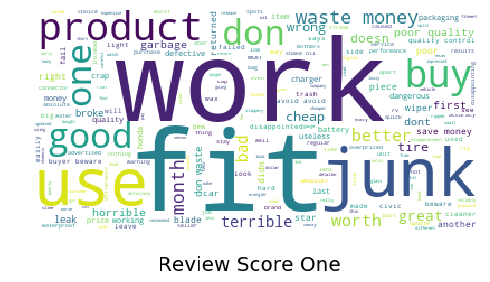

In [85]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

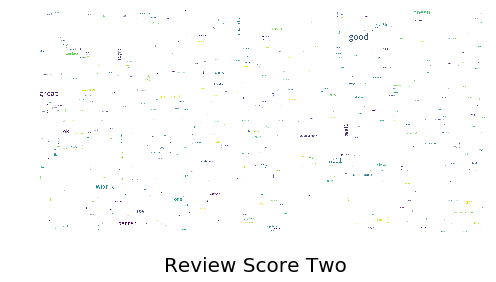

In [77]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")

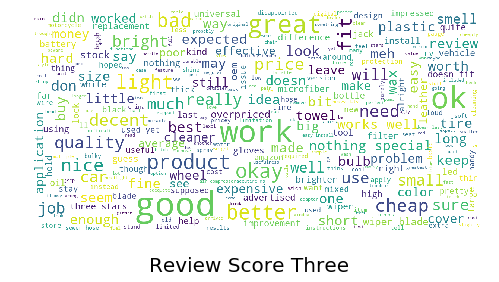

In [68]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

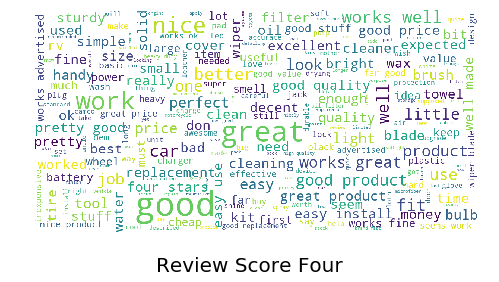

In [69]:
show_wordcloud(cluster1["summaryClean"][3], title = "Review Score Four")

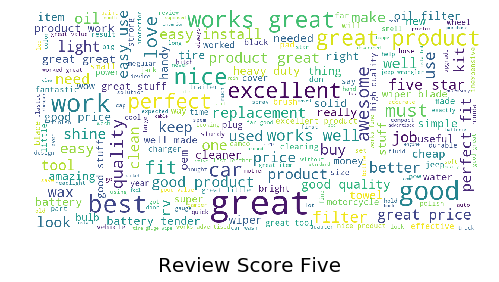

In [74]:
show_wordcloud(cluster1["summaryClean"][4], title = "Review Score Five")